## Работа 3 - Работа с библиотекой pandas

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
pays_data = pd.read_csv('pays.csv')
inn_info_public = pd.read_csv('inn_info_public.csv')

In [42]:
pays_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5430150 entries, 0 to 5430149
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   hash_inn_kt  int64  
 1   hash_inn_dt  int64  
 2   week         int64  
 3   count        int64  
 4   sum          float64
dtypes: float64(1), int64(4)
memory usage: 207.1 MB


In [43]:
inn_info_public.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240069 entries, 0 to 240068
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   hash_inn   240069 non-null  int64
 1   okved2     240069 non-null  int64
 2   region     240069 non-null  int64
 3   is_public  240069 non-null  bool 
dtypes: bool(1), int64(3)
memory usage: 5.7 MB


#### Задание 1

Размерность и первые 3 строки каждой таблицы

In [44]:
# размерность
print('Размерность таблицы pays_data: ', pays_data.shape)
print('Размерность таблицы inn_info_public: ', inn_info_public.shape)

Размерность таблицы pays_data:  (5430150, 5)
Размерность таблицы inn_info_public:  (240069, 4)


In [45]:
# первые 3 строки таблицы pays_data
pays_data.head(3)

,hash_inn_kt,hash_inn_dt,week,count,sum
0,0,0,1,4,38399.6
1,0,0,5,2,399.6
2,0,0,7,2,79.6


In [46]:
# первые 3 строки таблицы inn_info_public
inn_info_public.head(3)

,hash_inn,okved2,region,is_public
0,61058,34,86,True
1,8311,18,86,True
2,130273,-1,86,False


#### Задание 2

Подсчёт пропусков по столбцам

In [47]:
missing_df1 = pays_data.isnull().sum()
missing_df2 = inn_info_public.isnull().sum()

print("Пропуски в таблице pays_data:")
print(missing_df1)

print("\nПропуски в таблице inn_info_public:")
print(missing_df2)

Пропуски в таблице pays_data:
hash_inn_kt       0
hash_inn_dt       0
week              0
count             0
sum            1125
dtype: int64

Пропуски в таблице inn_info_public:
hash_inn     0
okved2       0
region       0
is_public    0
dtype: int64


#### Задание 3

Уникальные компании в таблице pays

In [48]:
unique_companies = pd.concat([pays_data['hash_inn_kt'], pays_data['hash_inn_dt']]).nunique()

print('Уникальных компаний в таблице pays:', unique_companies)

Уникальных компаний в таблице pays: 240071


#### Задание 4

Сумма и среднее количество платежей по неделям

In [49]:
# в коде группируем по week, выделяем столбец count,
# создаём новую таблицу при помощи .agg (столбцы week, sum, mean)
# reset_index() нужен, чтобы week автоматически не стал индексом

weekly_stats = pays_data.groupby('week')['count'].agg(['sum', 'mean']).reset_index()

print(weekly_stats)

    week     sum      mean
0      0    7232  3.111876
1      1  707513  2.963132
2      2  697729  2.885157
3      3  698557  2.884061
4      4  702679  2.844992
5      5  705049  2.891892
6      6  718498  2.941530
7      7  475101  2.707992
8      8  814890  2.962353
9      9  625740  2.822412
10    10  783554  2.953798
11    11  767920  2.945518
12    12  770527  2.958899
13    13  760078  2.883201
14    14  769726  2.944888
15    15  760607  2.964139
16    16  790270  2.986716
17    17  648306  2.852970
18    18  535185  2.760493
19    19  807507  3.004431
20    20  778119  3.004436
21    21  783617  2.981040
22    22  744712  2.938902
23    23       3  1.500000


#### Задание 5

5 компаний, которые отправили наибольшую сумму платежей за весь период

In [50]:
# группируем по hash_inn_kt, выбираем столбец sum, суммируем все суммы
# выводим топ 5 компаний и обновляем индексы
top5_senders = pays_data.groupby('hash_inn_kt')['sum'].sum().nlargest(5).reset_index()

print(top5_senders)


   hash_inn_kt           sum
0        81966  3.340752e+07
1        85582  1.882592e+07
2       217993  1.508303e+07
3        47570  1.458800e+07
4       196987  1.394582e+07


#### Задание 6

Распределение ОКВЭДов

    okved2  num_companies
0       -1          78654
1        0            815
2        1             50
3        2             90
4        3            842
..     ...            ...
76      75            187
77      76           2059
78      77            644
79      78            380
80      79            948

[81 rows x 2 columns]


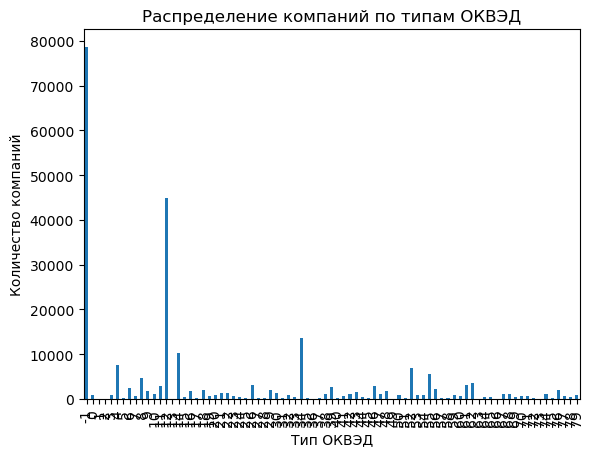

In [51]:
okved_counts = inn_info_public['okved2'].value_counts()

okved_table = inn_info_public['okved2'].value_counts().sort_index()
okved_table_df = okved_table.reset_index()
okved_table_df.columns = ['okved2', 'num_companies']

print(okved_table_df)

okved_counts.sort_index().plot(kind='bar')
plt.xlabel('Тип ОКВЭД')
plt.ylabel('Количество компаний')
plt.title('Распределение компаний по типам ОКВЭД')
plt.show()

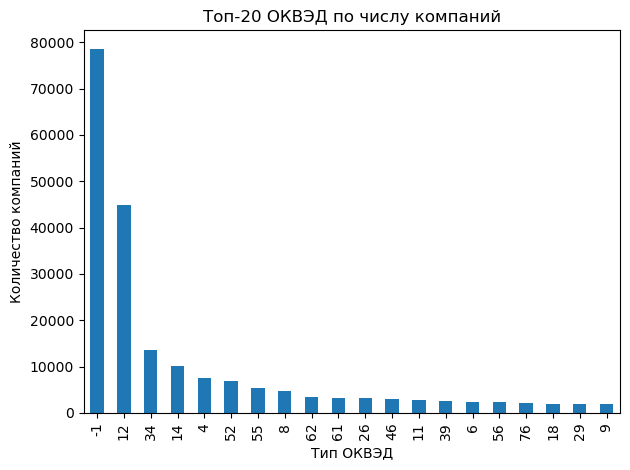

In [52]:
okved_counts = inn_info_public['okved2'].value_counts()
top20 = okved_counts.head(20)
top20.plot(kind='bar')
plt.xlabel('Тип ОКВЭД')
plt.ylabel('Количество компаний')
plt.title('Топ-20 ОКВЭД по числу компаний')
plt.tight_layout()
plt.show()


Я представила две гистограммы: на одной выведены все ОКВЭДы (но не читаемая гистограмма), на второй топ-20 ОКВЭДов. 
Насчёт ОКВЭДа -1 не уверена, компания не может существовать без ОКВЭД

#### Задание 7

Объединение двух таблиц

In [53]:
# Добавление данных об отправителе
df_merged = pays_data.merge(
    inn_info_public[['hash_inn', 'okved2', 'region']],
    left_on='hash_inn_kt',
    right_on='hash_inn',
    how='left'
).rename(columns={'okved2': 'okved2_kt', 'region': 'region_kt'})

# Добавление данных о получателе
df_merged = df_merged.merge(
    inn_info_public[['hash_inn', 'okved2', 'region']],
    left_on='hash_inn_dt',
    right_on='hash_inn',
    how='left'
).rename(columns={'okved2': 'okved2_dt', 'region': 'region_dt'})

# Убираем лишние столбцы hash_inn
df_pays_info = df_merged.drop(columns=['hash_inn_x', 'hash_inn_y'])

print(df_merged.head(40))

    hash_inn_kt  hash_inn_dt  week  count        sum  hash_inn_x  okved2_kt  \
0             0            0     1      4  38399.600           0         -1   
1             0            0     5      2    399.600           0         -1   
2             0            0     7      2     79.600           0         -1   
3             0            0     9      2    239.600           0         -1   
4             0            0    12      2     79.600           0         -1   
5             0            0    15      2    399.600           0         -1   
6             0            0    16      2      0.920           0         -1   
7             0            0    20      4   2399.600           0         -1   
8             0            0    21      4      0.800           0         -1   
9             0            0    22      2    239.600           0         -1   
10            0         7212     3      1    134.548           0         -1   
11            0         7212     8      1     49.820

#### Задание 8

Сумма платежей по ОКВЭДу

In [54]:
df_okved_sums = df_pays_info.groupby('okved2_kt')['sum'].sum().reset_index()
df_okved_sums.columns = ['okved2', 'sum_sent']
print(df_okved_sums)

    okved2      sum_sent
0       -1  6.768533e+08
1        0  2.674689e+06
2        1  4.062196e+04
3        2  3.806638e+07
4        3  5.605054e+05
..     ...           ...
76      75  1.951670e+06
77      76  2.829748e+07
78      77  4.633386e+05
79      78  9.893692e+06
80      79  4.406375e+06

[81 rows x 2 columns]


#### Задание 9

Доли от общема объёма, где отправитель и получатель находятся в разных регионах

In [55]:
inter_region_sum = df_pays_info.loc[df_pays_info['region_kt'] != df_pays_info['region_dt'], 'sum'].sum()
total_sum = df_pays_info['sum'].sum()
share = inter_region_sum / total_sum if total_sum else 0
print(f'Доля составляет {(share * 100).round(2)}%')

Доля составляет 34.45%


#### Задание 10

Средняя сумма платежей для публичных и непубличных компаний

In [56]:
merged = pays_data.merge(inn_info_public[['hash_inn', 'is_public']], left_on='hash_inn_kt', right_on='hash_inn', how='left')
avg_public = merged.groupby('is_public')['sum'].mean().reset_index()
avg_public.columns = ['is_public', 'avg_sum']

print(avg_public)


   is_public     avg_sum
0      False  395.533365
1       True  393.207246
